<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/PROJECT_bike_station/blob/master/01_%EC%9A%B4%EC%98%81%EC%9D%B4%EB%A0%A5_%EB%8C%80%EC%97%AC%EB%B0%98%EB%82%A9%EC%8B%9C%EA%B0%84_%EB%8C%80_%EB%B3%84_%EB%B9%88%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01.운영이력_자전거 사용시간**
- [01.운영이력] 분석결과 움직임이 없는(시간차['Diff']가 0인 자전거 스테이션 존재 확인)
- 사용기간이 1년에서 0일로 다양

## '01_운영이력자전거 사용 시간'을 통해 추출할 수 있을 데이터 예측

1.   대여/ 반납 시간 밀집 기간 추출 가능 -> 출퇴근 시간에 사용량이 몰려있을 것으로 예상
2.   시간을 기준으로 밀집 대여/반납 스테이션 위치 확인 가능
3. 3개년(2017-2019) 간 사용빈도 증가 추이





In [2]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/'My Drive'/'고양시'

/content/drive/My Drive/고양시


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
bicycle_now=pd.read_csv('01.운영이력.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


운영이력 데이터 컬럼
- LEAS_NO 대여 번호
- LEAS_DATE 대여 시간 
- LEAS_STATION 대여 스테이션 번호 
- LEAS_DEF_NO 대여 거치대 번호
- RTN_DATE 반납 시간 
- RTN_STATION 반납 스테이션 번호 
- RTN_DEF_NO 반납 거치대 번호
- RTN_PROCESS 관제반납구분값 (01:관제반납/02:관리자반납/03:관리자반출/04:타 사용자 반납/05:다른 사용자 반출)
- TRNV_QTY 추정 이동 거리(m) ! -> 평균 이동거리
- MEMB_DIV 회원 구분(비회원은 99이며 나머지는 정회원)
- MEMB_NO 회원 번호
- TEMP_MEMB_NO 비회원 번호
- BIKE_TAG 자전거 번호

자전거 대여/반납으로 데이터 분리

In [11]:
bicycle_LEAS=bicycle_now[['LEAS_DATE','LEAS_STATION']]

In [54]:
bicycle_RTN=bicycle_now[['RTN_DATE', 'RTN_STATION']]

# 대여_LEAS

In [12]:
#자전거 대여(날짜/스테이션) - bicycle_LEAS
# 시간만 분리

# 먼저 데이터['LEAS_DATE'] 타입이 object 인지 확인
bicycle_LEAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142688 entries, 0 to 3142687
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   LEAS_DATE     object
 1   LEAS_STATION  int64 
dtypes: int64(1), object(1)
memory usage: 48.0+ MB


In [14]:
#'년원일'과 ' 시분초' 쪼개기
bicycle_LEAS['tempDATE']=bicycle_LEAS.LEAS_DATE.apply(lambda x:x.split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# tempDATE에서 시간만 분리
bicycle_LEAS['LEAS_hour']=bicycle_LEAS.tempDATE.apply(lambda x:x[1].split(":")[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
bicycle_LEAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142688 entries, 0 to 3142687
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   LEAS_DATE     object
 1   LEAS_STATION  int64 
 2   tempDATE      object
 3   LEAS_hour     object
dtypes: int64(1), object(3)
memory usage: 95.9+ MB


In [16]:
bicycle_LEAS.head(3)

,LEAS_DATE,LEAS_STATION,tempDATE,LEAS_hour
0,2017-01-01 00:00:41,213,"[2017-01-01, 00:00:41]",00
1,2017-01-01 00:01:03,231,"[2017-01-01, 00:01:03]",00
2,2017-01-01 00:01:50,119,"[2017-01-01, 00:01:50]",00


In [17]:
bicycle_LEAS.tail(3)

,LEAS_DATE,LEAS_STATION,tempDATE,LEAS_hour
3142685,2019-12-31 23:55:27,333,"[2019-12-31, 23:55:27]",23
3142686,2019-12-31 23:59:14,264,"[2019-12-31, 23:59:14]",23
3142687,2019-12-31 23:59:30,214,"[2019-12-31, 23:59:30]",23


In [21]:
# 시간(컬럼[LEAS_hour]) 0-23으로 분리
# 시간대 별로 방문하는 스테이션 갯수 카운트
# 시각화
# 대여시간이 많은 시간대에 자전거 스테이션이 알맞게 있는가

bicycle_LEAS.groupby('LEAS_hour')['LEAS_STATION']

In [22]:
bicycle_LEAS.head()

,LEAS_DATE,LEAS_STATION,tempDATE,LEAS_hour
0,2017-01-01 00:00:41,213,"[2017-01-01, 00:00:41]",00
1,2017-01-01 00:01:03,231,"[2017-01-01, 00:01:03]",00
2,2017-01-01 00:01:50,119,"[2017-01-01, 00:01:50]",00
3,2017-01-01 00:02:09,121,"[2017-01-01, 00:02:09]",00
4,2017-01-01 00:03:32,320,"[2017-01-01, 00:03:32]",00


In [50]:
#대여시간을 기준으로 groupby한 후 count
bicycle_LEAS.groupby('LEAS_hour')['LEAS_STATION'].count()

LEAS_hour
00     99789
01     75957
02     52723
03     31058
04     21666
05     28283
06     51563
07    107239
08    186510
09    115482
10    100704
11    108300
12    128535
13    142033
14    145493
15    168167
16    192565
17    223062
18    258162
19    217050
20    191357
21    188466
22    186559
23    121965
Name: LEAS_STATION, dtype: int64

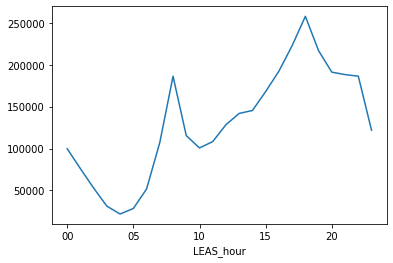

In [51]:
#대여시간에 따른 이용 빈도 시각화
bicycle_LEAS.groupby('LEAS_hour')['LEAS_STATION'].count().plot()

In [47]:
df_bicycle_LEAS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00 to 23
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LEAS_STATION  24 non-null     int64
dtypes: int64(1)
memory usage: 1.0+ KB


#반납_RTN

In [55]:
bicycle_RTN['tempDATE']=bicycle_RTN.RTN_DATE.apply(lambda x:x.split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
bicycle_RTN['RTN_hour']=bicycle_RTN.tempDATE.apply(lambda x:x[1].split(":")[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
bicycle_RTN.head(3)

,RTN_DATE,RTN_STATION,tempDATE,RTN_hour
0,2017-01-01 00:13:52,260,"[2017-01-01, 00:13:52]",00
1,2017-01-01 00:50:24,231,"[2017-01-01, 00:50:24]",00
2,2017-01-01 01:01:50,0,"[2017-01-01, 01:01:50]",01


In [58]:
# 시간(컬럼[RTN_hour]) 0-23으로 분리
# 시간대 별로 방문하는 스테이션 갯수 카운트
# 시각화
# 반납시간이 많은 시간대에 자전거 스테이션이 알맞게 있는가

bicycle_RTN.groupby('RTN_hour')['RTN_STATION']

In [59]:
#반납시간을 기준으로 groupby한 후 count
bicycle_RTN.groupby('RTN_hour')['RTN_STATION'].count()

RTN_hour
00    109614
01     84627
02     61337
03     37673
04     24331
05     27165
06     43983
07     88834
08    176166
09    124611
10     97436
11    101293
12    119974
13    132827
14    136946
15    155800
16    178805
17    219241
18    254892
19    227658
20    197518
21    191544
22    205097
23    145316
Name: RTN_STATION, dtype: int64

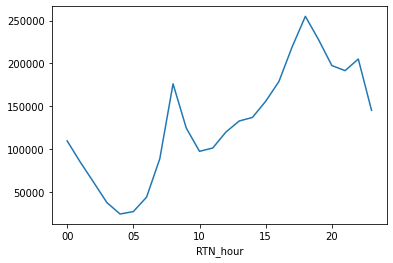

In [60]:
# 반납시간에 따른 이용빈도 시각화
bicycle_RTN.groupby('RTN_hour')['RTN_STATION'].count().plot()

# 대여/반납 시간 대별 사용빈도 분석 결과
- 대여/반납 시간 대별 사용빈도 추이가 유사
- 대여 시간을 기준으로 출근/퇴근/점심 시간 이용 빈도 분석

In [87]:
# 시간대별 대여 현황
bicycle_LEAS['LEAS_hour'].value_counts()

18    258162
17    223062
19    217050
16    192565
20    191357
21    188466
22    186559
08    186510
15    168167
14    145493
13    142033
12    128535
23    121965
09    115482
11    108300
07    107239
10    100704
00     99789
01     75957
02     52723
06     51563
03     31058
05     28283
04     21666
Name: LEAS_hour, dtype: int64

In [100]:
len(bicycle_LEAS)

3142688

In [102]:
bicycle_LEAS['LEAS_hour'].iloc[1] == "07"

False

In [110]:
for i in range(len(bicycle_LEAS)):
  if bicycle_LEAS['LEAS_hour'].iloc[i]== "07":
    bicycle_LEAS['LEAS_STATION'].iloc[i]
    print("출근", bicycle_LEAS['LEAS_hour'][i], "대여장소", bicycle_LEAS['LEAS_STATION'][i])
  elif bicycle_LEAS['LEAS_hour'].iloc[i]== "08":
    bicycle_LEAS['LEAS_STATION'].iloc[i]
    print("출근", bicycle_LEAS['LEAS_hour'][i], "대여장소", bicycle_LEAS['LEAS_STATION'][i])
  elif bicycle_LEAS['LEAS_hour'].iloc[i]== "09":
    bicycle_LEAS['LEAS_STATION'].iloc[i]
    print("출근", bicycle_LEAS['LEAS_hour'][i], "대여장소", bicycle_LEAS['LEAS_STATION'][i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
출근 07 대여장소 256
출근 07 대여장소 323
출근 07 대여장소 127
출근 07 대여장소 232
출근 07 대여장소 320
출근 07 대여장소 231
출근 07 대여장소 318
출근 07 대여장소 261
출근 07 대여장소 340
출근 07 대여장소 168
출근 07 대여장소 256
출근 07 대여장소 111
출근 08 대여장소 350
출근 08 대여장소 247
출근 08 대여장소 128
출근 08 대여장소 137
출근 08 대여장소 207
출근 08 대여장소 234
출근 08 대여장소 316
출근 08 대여장소 229
출근 08 대여장소 110
출근 08 대여장소 262
출근 08 대여장소 261
출근 08 대여장소 233
출근 08 대여장소 205
출근 08 대여장소 229
출근 08 대여장소 328
출근 08 대여장소 236
출근 08 대여장소 229
출근 08 대여장소 233
출근 08 대여장소 317
출근 08 대여장소 261
출근 08 대여장소 231
출근 08 대여장소 229
출근 08 대여장소 203
출근 08 대여장소 235
출근 08 대여장소 261
출근 08 대여장소 116
출근 08 대여장소 227
출근 08 대여장소 238
출근 08 대여장소 318
출근 08 대여장소 131
출근 08 대여장소 203
출근 08 대여장소 330
출근 08 대여장소 170
출근 08 대여장소 256
출근 08 대여장소 114
출근 08 대여장소 166
출근 08 대여장소 302
출근 08 대여장소 324
출근 08 대여장소 235
출근 08 대여장소 261
출근 08 대여장소 320
출근 08 대여장소 225
출근 08 대여장소 210
출근 08 대여장소 253
출근 08 대여장소 323
출근 08 대여장소 320
출근 08 대여장소 258
출근 08 대여장소 237
출근 08 대여장소 350
출근 08 대여장소 331
출근 08 대여장소 320
출근 08 대여장소 131
출근 0

KeyboardInterrupt: ignored

In [80]:
# 자전거 스테이션 대여 현황
bicycle_LEAS['LEAS_STATION'].value_counts()

253    83134
254    78594
309    78272
259    70746
210    69549
       ...  
265      767
264      688
351      473
263      253
998       25
Name: LEAS_STATION, Length: 156, dtype: int64